<a href="https://colab.research.google.com/github/searchsolved/search-solved-public-seo/blob/main/archive.org_broken_link_automapper/archive_org_redirect_mapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Script by @LeeFootSEO
Early Access To Apps & Feature Requests: https://www.patreon.com/leefootseo
Buy me a Coffee: https://www.buymeacoffee.com/leefootseo

# Visualise Search Console Coverage Reports
Spot issues fast by visualising your Search Console Coverage Reports. Especially useful to visualise low quality folder paths at a glance (crawled, not indexed).

## How to use:
Run all cells and upload a Search Console Coverage Report in *Excel* format. 

### Options:
Option to set a starting folder depth (Useful to step through cctld folders)

### Output
Exports a Treemap and Sunburst Chart from the coverage report

*   Interactive Treemap .html file
*   Interactive Sunburst .html file

In [ ]:
# set optional folder depth offset # default = 1
folder_start = 2

In [ ]:
# Custom Title for Reports
title = "Coverage Report"

In [ ]:
!pip install pandas
!pip install pip install plotly==5.0.0

In [ ]:
import re
import urllib.parse as urlparse
from collections import Counter
from glob import glob

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import plotly.express as px
from nltk.corpus import stopwords
from wordcloud import WordCloud
from google.colab import files

In [ ]:
# upload any Search Console Coverage Report - Must be an Excel file export - csv not accepted!
uploaded = files.upload()

Saving https___easyodds.com_es_-Coverage-Drilldown-2021-08-11.xlsx to https___easyodds.com_es_-Coverage-Drilldown-2021-08-11 (1).xlsx


In [ ]:
filename = list(uploaded.keys())[0]  # get the filename from the upload
df = pd.read_excel(filename, 'Table')  # choose the right sheet from Excel
nltk.download('stopwords')
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                                 URL Last crawled
0  https://easyodds.com/es/horse-racing/wolverham...   2021-08-10
1  https://easyodds.com/es/horse-racing/huntingdo...   2021-08-09
2  https://easyodds.com/es/horse-racing/chelmsfor...   2021-08-09
3  https://easyodds.com/es/horse-racing/kenilwort...   2021-08-09
4  https://easyodds.com/es/horse-racing/kenilwort...   2021-08-09


In [ ]:
df['total_urls'] = 1  # used to count in the grouping
df["protocol"], df["domain"], df["path"], df["query"], df["fragment"] = zip(*df["URL"].map(urlparse.urlsplit))

# make temp df to split with expand=true and then merge back by the index.
df['path'] = df['path'].apply(lambda x: x.replace("//", "/"))
df2 = df['path'].str.split('/', expand=True)
df2 = df2.fillna("missing_value")
df = pd.merge(df, df2, left_index=True, right_index=True)
next_folder = folder_start + 1

In [ ]:
# concat 0 + 1 path to merge and group by each depth. e.g. level1  + level 2 together.
df['level_1+2'] = "/" + df[next_folder]

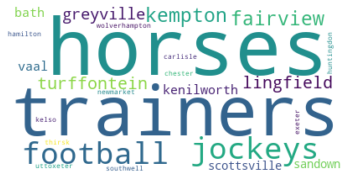

In [ ]:
cnt = Counter()
english_stopwords = set(stopwords.words('english'))

for path in df['level_1+2']:
  words = re.split("[-/]", path)
  for word in words:
    if len(word) > 0 and word not in english_stopwords and not word.isdigit():
      cnt[word] += 1

cnt.most_common(25)

word_cloud = [x[0] for x in cnt.most_common(25)]
word_cloud_obj = WordCloud(max_words=25, background_color="white").generate(" ".join(word_cloud))

plt.imshow(word_cloud_obj, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud.png', dpi=300)
plt.show()

In [ ]:
try:
    treemap_fig = px.treemap(df, path=[px.Constant(title), folder_start, next_folder, 'URL'],values='total_urls', color_discrete_sequence=px.colors.qualitative.Antique)
except ValueError:
    print("Not all URLs can go to a url depth of", folder_start, "using default depths instead.")
    folder_start = 1
    next_folder = 2
    treemap_fig = px.treemap(df, path=[px.Constant(title), folder_start, next_folder, 'URL'], values='total_urls', color_discrete_sequence=px.colors.qualitative.Antique)
    pass

treemap_fig.show()

In [ ]:
# plot a sun burst
try:
    sunburst_fig = px.sunburst(df, path=[px.Constant(title), folder_start, next_folder, 'URL'],values='total_urls', color_discrete_sequence=px.colors.qualitative.Antique)
except ValueError:
    print("Not all URLs can go to a url depth of", folder_start, "using default depths instead.")
    folder_start = 1
    next_folder = 2
    sun_burst_fig = px.treemap(df, path=[px.Constant("Coverage Report", ), folder_start, next_folder, 'URL'], values='total_urls', color_discrete_sequence=px.colors.qualitative.Antique)
    pass

sunburst_fig.show()

Remember to Click ''Allow Downloading of Multiple Files' in Chrome when Prompted!

In [ ]:
# download the sunburst .html chart
sunburst_fig.write_html("coverage_report_sunburst.html")
files.download("coverage_report_sunburst.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download the treemap .html chart
treemap_fig.write_html("coverage_report_treemap.html")
files.download("coverage_report_treemap.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# download the word_cloud chart
files.download("word_cloud.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>